In [151]:
import os

import pandas as pd


In [152]:
DO_FILL_NA = True

In [153]:
RESULTS_MODEL_FOLDER = r"D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\Luận văn tốt nghiệp Thạc sĩ Khoa học dữ liệu\QuantNet\Results_model"
RESULTS_BASELINE_FOLDER = r"D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\Luận văn tốt nghiệp Thạc sĩ Khoa học dữ liệu\QuantNet\Results"

In [154]:
def get_results_summary(RESULTS_MODEL_FOLDER, mode="models"):
    results_summary = pd.DataFrame(
        columns=[
            "region",
            "transferstrat",
            "non_zero_count",
            "valperiod",
            "testperiod",
            "train_steps",
            "tasksteps",
            "average_sharpe_ratio",
            "average_calmar_ratio",
            "average_maximum_draw_down",
            "average_annual_return",
            "average_volatility",
            "average_sortino_ratio",
            "average_down_risk",
            "average_value_at_risk",
            "average_tail_risk",
            "average_skew",
            "average_kurtosis",
        ]
    )
    csv_files = [f for f in os.listdir(RESULTS_MODEL_FOLDER) if f.endswith(".csv")]
    csv_files
    for i in range(len(csv_files)):
        file_name = csv_files[i]
        df = pd.read_csv(f"{RESULTS_MODEL_FOLDER}/{file_name}")
        if DO_FILL_NA:
            df = df.fillna(0)
        else:
            df = df[df["ANN_RET"] != 0]

        # Parse the file name to extract the relevant fields
        text = file_name.split("_")
        region = text[0]
        non_zero_count = len(df)
        valperiod = text[2]
        testperiod = text[4]
        if mode == "models":
            train_steps = text[6]
            tasksteps = text[8]
            transferstrat = (
                f"{train_steps}_{file_name.split('_transferstrat_')[1].split('_lr')[0]}"
            )
        elif mode == "baseline":
            transferstrat = file_name.split("_baseline_")[1].split(".csv")[0]
            train_steps = None
            tasksteps = None
        else:
            raise ValueError(f"Invalid mode: {mode}")
        df_test = df[df["set"] == "test"]
        average_sharpe_ratio = df_test["SR"].mean()
        average_calmar_ratio = df_test["CR"].mean()
        average_maximum_draw_down = df_test["MDD"].mean()
        average_annual_return = df_test["ANN_RET"].mean()
        average_volatility = df_test["ANN_VOL"].mean()
        average_sortino_ratio = df_test["SortR"].mean()
        average_down_risk = df_test["DownRisk"].mean()
        average_value_at_risk = df_test["VaR"].mean()
        average_tail_risk = df_test["TailR"].mean()
        average_skew = df_test["Skew"].mean()
        average_kurtosis = df_test["Kurt"].mean()

        # Create a pandas Series with the extracted values
        meta_series = pd.Series(
            [
                region,
                transferstrat,
                non_zero_count,
                valperiod,
                testperiod,
                train_steps,
                tasksteps,
                average_sharpe_ratio,
                average_calmar_ratio,
                average_maximum_draw_down,
                average_annual_return,
                average_volatility,
                average_sortino_ratio,
                average_down_risk,
                average_value_at_risk,
                average_tail_risk,
                average_skew,
                average_kurtosis,
            ],
            index=[
                "region",
                "transferstrat",
                "non_zero_count",
                "valperiod",
                "testperiod",
                "train_steps",
                "tasksteps",
                "average_sharpe_ratio",
                "average_calmar_ratio",
                "average_maximum_draw_down",
                "average_annual_return",
                "average_volatility",
                "average_sortino_ratio",
                "average_down_risk",
                "average_value_at_risk",
                "average_tail_risk",
                "average_skew",
                "average_kurtosis",
            ],
        )

        # Append the Series as a new row to the results DataFrame
        results_summary = pd.concat(
            [results_summary, meta_series.to_frame().T], ignore_index=True
        )

    return results_summary

In [155]:
def get_results_grouped(results_summary):
    # Convert all columns except 'region' and 'transferstrat' to numeric
    cols_to_convert = [
        col for col in results_summary.columns if col not in ["region", "transferstrat"]
    ]
    cols_to_convert

    results_summary[cols_to_convert] = results_summary[cols_to_convert].apply(
        pd.to_numeric, errors="coerce"
    )
    results_summary_grouped = results_summary.groupby("transferstrat").mean(
        numeric_only=True
    )
    results_summary_grouped = results_summary_grouped.drop(
        columns=["valperiod", "testperiod", "train_steps", "tasksteps"]
    )
    return results_summary_grouped

In [156]:
results_summary_models = get_results_summary(RESULTS_MODEL_FOLDER)
results_summary_models

,region,transferstrat,non_zero_count,valperiod,testperiod,train_steps,tasksteps,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
0,Americas,1000_global_linear_linear,3045,0,756,1000,0,-0.101629,-0.006249,-0.482689,-0.053714,0.313453,-0.09233,0.220728,-0.031768,0.985273,0.130796,16.377196
1,Americas,1000_global_linear_lstm,3045,0,756,1000,0,0.217888,0.279788,-0.159673,0.030851,0.10718,0.367922,0.07493,-0.010047,1.051022,-0.196955,23.456196
2,Americas,1000_global_lstm_linear,3045,0,756,1000,0,0.2445,0.274472,-0.125566,0.024097,0.087012,0.423623,0.059515,-0.007409,1.082012,0.108796,30.677008
3,Americas,1000_global_lstm_lstm,3045,0,756,1000,0,0.17429,0.206376,-0.192877,0.023766,0.127997,0.293298,0.088051,-0.013297,1.020792,0.317431,16.041915
4,Americas,1000_no_transfer_linear,3045,0,756,1000,0,-0.071531,0.116193,-0.01219,0.000285,0.006081,0.001081,0.004238,-0.0005,0.985653,-0.150128,33.338286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,MEA,500_global_linear_lstm,933,0,756,500,0,0.492639,0.728585,-0.132538,0.060151,0.099402,0.90838,0.065187,-0.008034,1.211832,0.448467,23.790762
92,MEA,500_global_lstm_linear,933,0,756,500,0,0.44487,0.681026,-0.129458,0.055195,0.091184,0.800996,0.060297,-0.007681,1.168529,0.351099,20.208769
93,MEA,500_global_lstm_lstm,933,0,756,500,0,0.16116,0.187699,-0.188822,0.018543,0.120504,0.281303,0.081923,-0.011702,1.060016,0.327277,12.841301
94,MEA,500_no_transfer_linear,933,0,756,500,0,0.30084,0.545195,-0.010735,0.003212,0.006868,0.739369,0.00442,-0.000454,1.141454,0.565488,41.975886


In [157]:
results_summary_baseline = get_results_summary(RESULTS_BASELINE_FOLDER, mode="baseline")
results_summary_baseline

,region,transferstrat,non_zero_count,valperiod,testperiod,train_steps,tasksteps,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
0,Americas,buy_and_hold,3045,0,756,None,None,0.183908,0.221635,-0.002932,0.001503,0.00203,0.305422,0.001336,-0.000198,1.019992,0.330703,16.015522
1,Americas,buy_and_hold_shifted_1,3045,0,756,None,None,0.183908,0.221635,-0.002932,0.001503,0.00203,0.305422,0.001336,-0.000198,1.019992,0.330703,16.015522
2,Americas,csec_mom,3045,0,756,None,None,0.156477,0.209499,-0.007819,-0.000959,0.003255,0.314023,0.002252,-0.000308,0.996571,0.878188,28.979839
3,Americas,csec_mom_shifted_1,3045,0,756,None,None,0.158832,0.210131,-0.007782,-0.000915,0.003251,0.316536,0.002243,-0.000308,0.999598,0.855134,28.311037
4,Americas,risk_parity,3045,0,756,None,None,0.202704,0.248655,-0.002739,0.001507,0.001919,0.343701,0.001268,-0.000183,1.041968,0.269512,21.235993
5,Americas,risk_parity_shifted_1,3045,0,756,None,None,0.179652,0.22651,-0.002764,0.001488,0.001919,0.307766,0.001269,-0.000183,1.035076,0.248183,20.744926
6,Americas,ts_mom,3045,0,756,None,None,0.169299,0.222664,-0.007378,-0.000971,0.002905,0.320548,0.002014,-0.000269,0.997753,0.772736,24.526062
7,Americas,ts_mom_shifted_1,3045,0,756,None,None,0.176376,0.227859,-0.007331,-0.000942,0.002903,0.33026,0.002009,-0.000268,0.998024,0.751611,23.99143
8,Americas,risk_parity_shifted_1,2994,756,756,None,None,0.316374,0.331909,-0.367154,0.083155,0.268292,0.616117,0.1876,-0.024643,1.009938,-0.145227,14.312348
9,Asia and Pacific,buy_and_hold,3165,0,756,None,None,0.153495,0.216378,-0.006277,0.000393,0.003533,0.26937,0.002382,-0.000341,1.040065,0.59505,12.890531


In [158]:
results_summary_models_grouped = get_results_grouped(results_summary_models)
results_summary_models_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
1000_global_linear_linear,2212.5,0.170856,0.277225,-0.419514,0.036175,0.304022,0.336716,0.205852,-0.028330,1.041795,0.181831,17.407433
1000_global_linear_lstm,2212.5,0.357383,0.452747,-0.166332,0.045979,0.113734,0.627825,0.077521,-0.009891,1.098516,0.095361,24.479196
1000_global_lstm_linear,2212.5,0.302436,0.442598,-0.134453,0.033103,0.090284,0.594182,0.060567,-0.007317,1.094079,0.230263,33.618744
1000_global_lstm_lstm,2212.5,0.186056,0.236020,-0.188262,0.026057,0.125901,0.338437,0.084389,-0.012402,1.042099,0.284230,17.096867
1000_no_transfer_linear,2212.5,0.140946,0.309391,-0.010509,0.001307,0.005968,0.367301,0.003993,-0.000415,1.063061,0.314870,43.973577
1000_no_transfer_lstm,2212.5,0.187294,0.292803,-0.135570,0.012035,0.083321,0.369350,0.057967,-0.007597,1.073856,0.131776,28.243050
100_global_linear_linear,2212.5,0.143541,0.290624,-0.389411,0.028162,0.269619,0.315778,0.182775,-0.024851,1.038185,0.105230,18.408015
100_global_linear_lstm,2212.5,0.258322,0.383420,-0.219796,0.038487,0.150039,0.492007,0.100123,-0.014026,1.066411,0.261182,20.852682
100_global_lstm_linear,2212.5,0.317980,0.465829,-0.246128,0.059159,0.174595,0.582445,0.114763,-0.015923,1.084178,0.262622,18.964479


In [159]:
results_summary_baseline_grouped = get_results_grouped(
    results_summary=results_summary_baseline
)
results_summary_baseline_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
buy_and_hold,2212.500,0.216255,0.268740,-0.012745,0.002434,0.008079,0.387051,0.005340,-0.000728,1.046758,0.305938,16.836102
buy_and_hold_shifted_1,2212.500,0.216255,0.268740,-0.012745,0.002434,0.008079,0.387051,0.005340,-0.000728,1.046758,0.305938,16.836102
csec_mom,2212.500,0.123761,0.217097,-0.025545,-0.000650,0.013638,0.284653,0.008963,-0.001029,0.999663,0.826719,32.465175
csec_mom_shifted_1,2212.500,0.105873,0.200321,-0.025387,-0.000634,0.013533,0.255966,0.008858,-0.001033,0.995668,0.826375,31.724383
risk_parity,2212.500,0.227245,0.282839,-0.012536,0.002235,0.007649,0.395623,0.005240,-0.000698,1.060568,0.287708,21.021054
risk_parity_shifted_1,2205.375,0.219139,0.276908,-0.193172,0.030387,0.137893,0.438656,0.094001,-0.012533,1.060087,0.223273,17.760152
ts_mom,2212.500,0.112738,0.206898,-0.022606,-0.000666,0.011916,0.246815,0.007853,-0.000912,0.998821,0.628673,25.400485
ts_mom_shifted_1,2212.500,0.096540,0.186886,-0.022475,-0.000630,0.011835,0.219160,0.007751,-0.000914,0.995464,0.622432,24.913084


In [160]:
results_grouped = pd.concat(
    [results_summary_models_grouped, results_summary_baseline_grouped]
)
results_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
1000_global_linear_linear,2212.500,0.170856,0.277225,-0.419514,0.036175,0.304022,0.336716,0.205852,-0.028330,1.041795,0.181831,17.407433
1000_global_linear_lstm,2212.500,0.357383,0.452747,-0.166332,0.045979,0.113734,0.627825,0.077521,-0.009891,1.098516,0.095361,24.479196
1000_global_lstm_linear,2212.500,0.302436,0.442598,-0.134453,0.033103,0.090284,0.594182,0.060567,-0.007317,1.094079,0.230263,33.618744
1000_global_lstm_lstm,2212.500,0.186056,0.236020,-0.188262,0.026057,0.125901,0.338437,0.084389,-0.012402,1.042099,0.284230,17.096867
1000_no_transfer_linear,2212.500,0.140946,0.309391,-0.010509,0.001307,0.005968,0.367301,0.003993,-0.000415,1.063061,0.314870,43.973577
1000_no_transfer_lstm,2212.500,0.187294,0.292803,-0.135570,0.012035,0.083321,0.369350,0.057967,-0.007597,1.073856,0.131776,28.243050
100_global_linear_linear,2212.500,0.143541,0.290624,-0.389411,0.028162,0.269619,0.315778,0.182775,-0.024851,1.038185,0.105230,18.408015
100_global_linear_lstm,2212.500,0.258322,0.383420,-0.219796,0.038487,0.150039,0.492007,0.100123,-0.014026,1.066411,0.261182,20.852682
100_global_lstm_linear,2212.500,0.317980,0.465829,-0.246128,0.059159,0.174595,0.582445,0.114763,-0.015923,1.084178,0.262622,18.964479


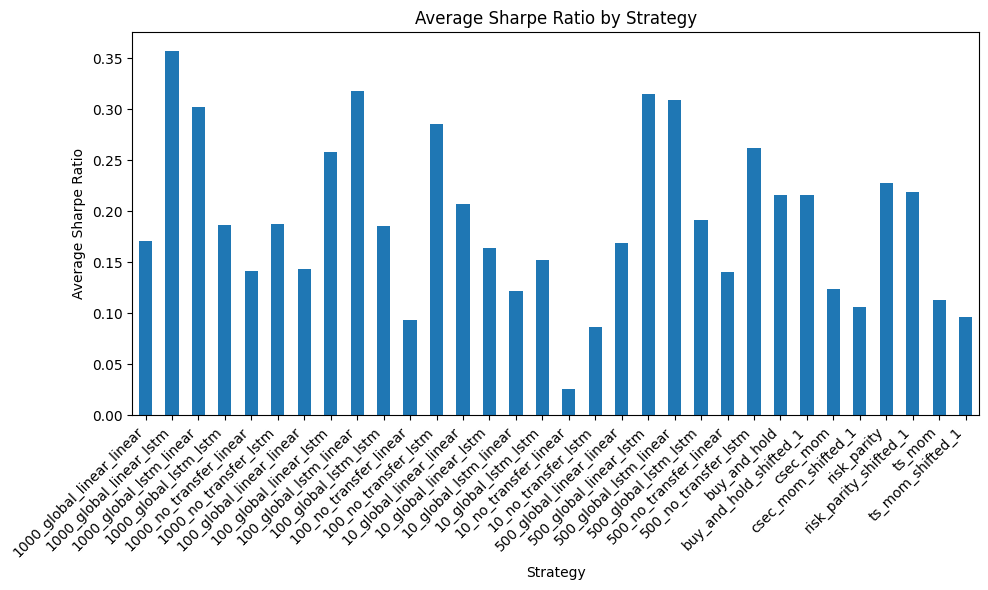

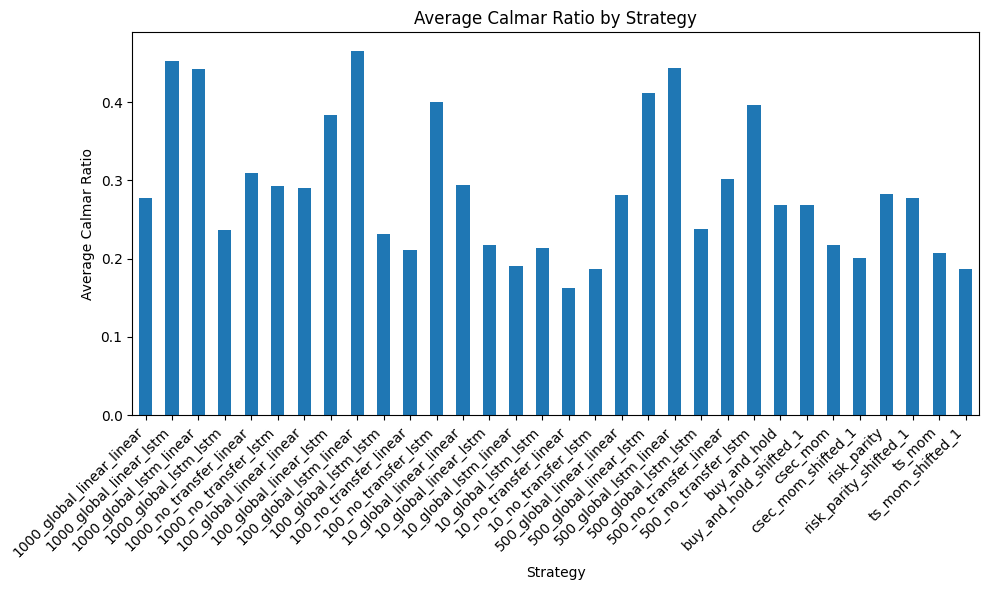

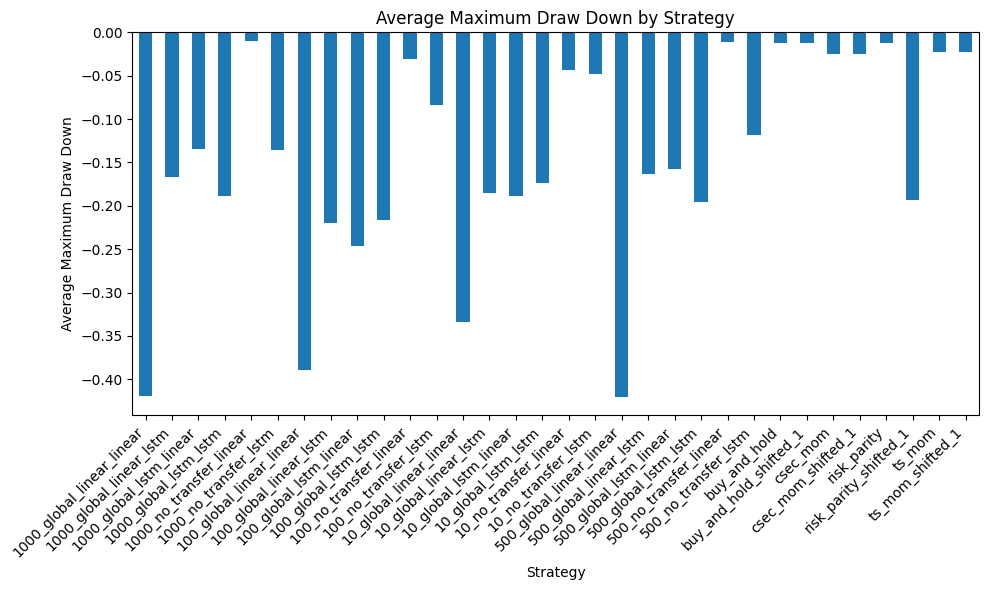

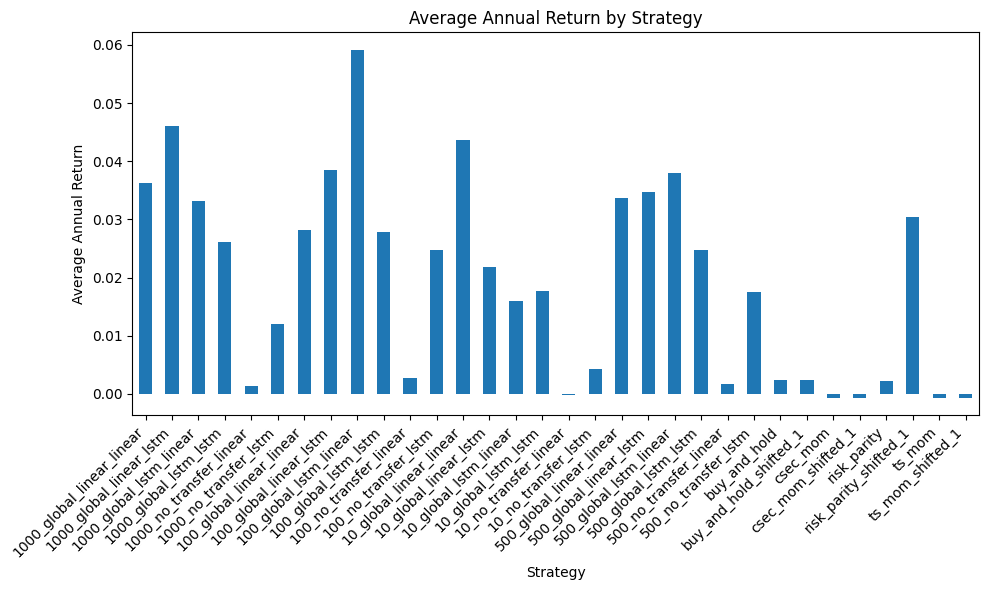

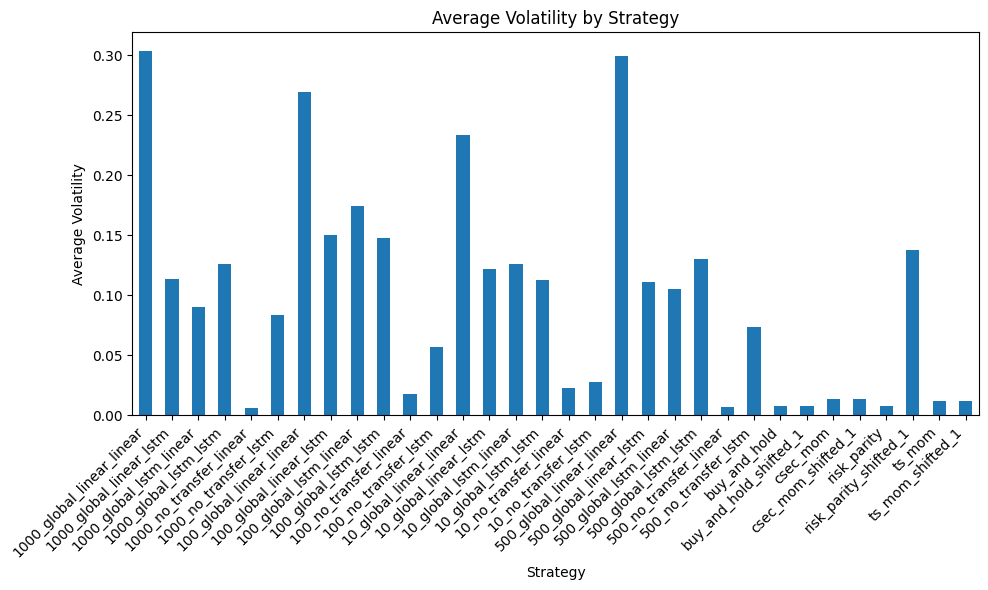

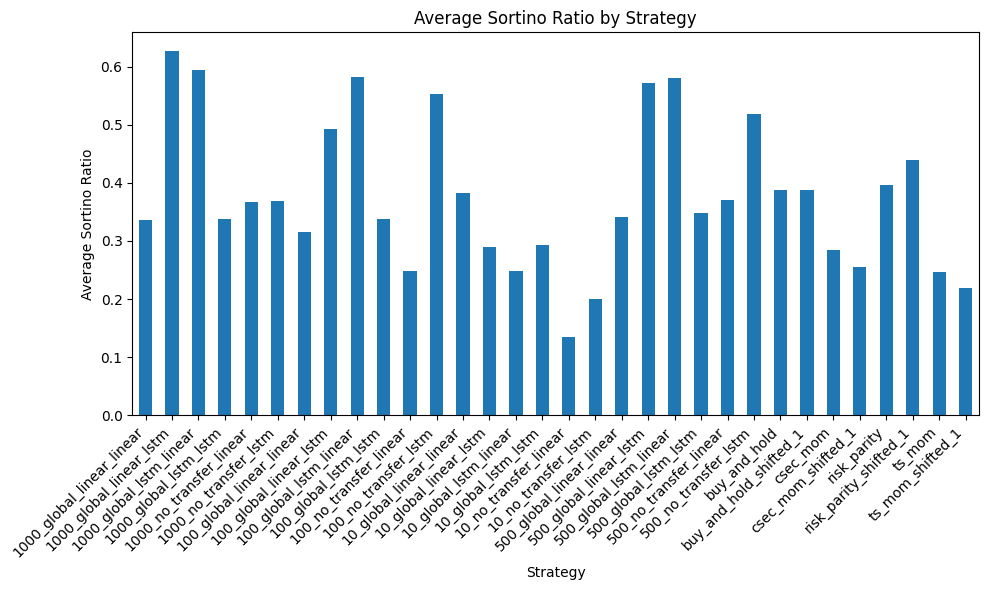

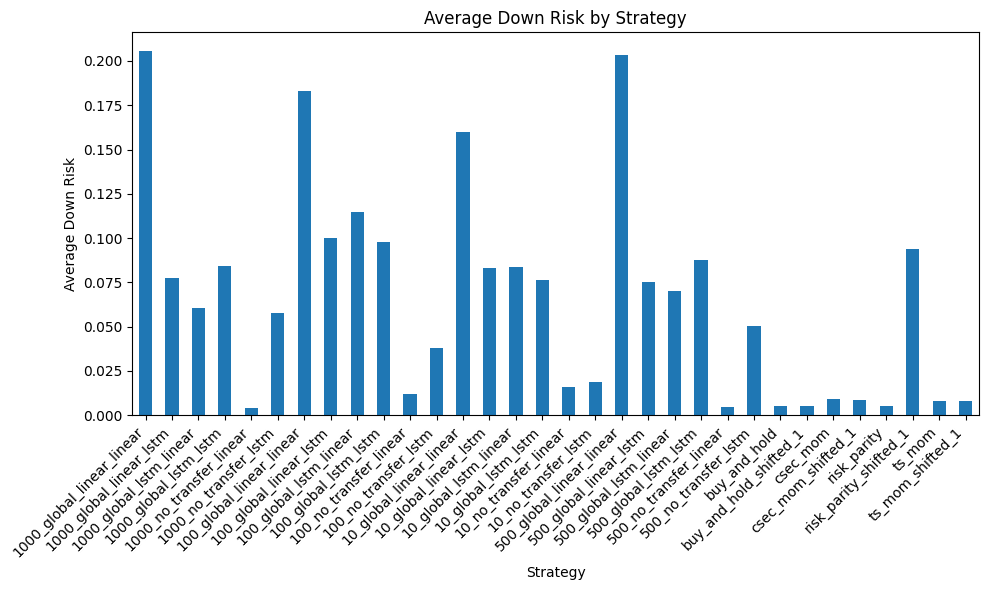

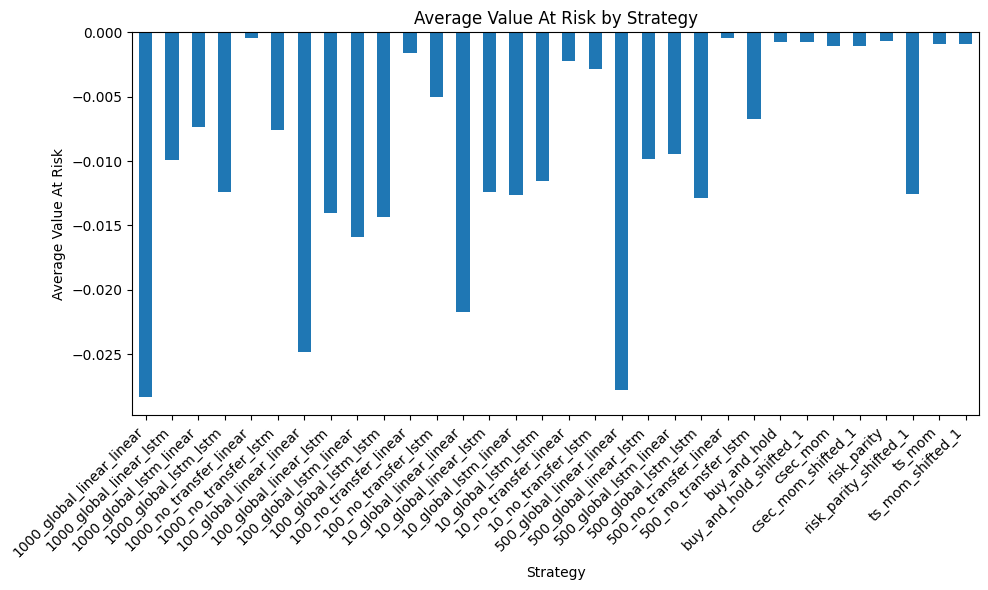

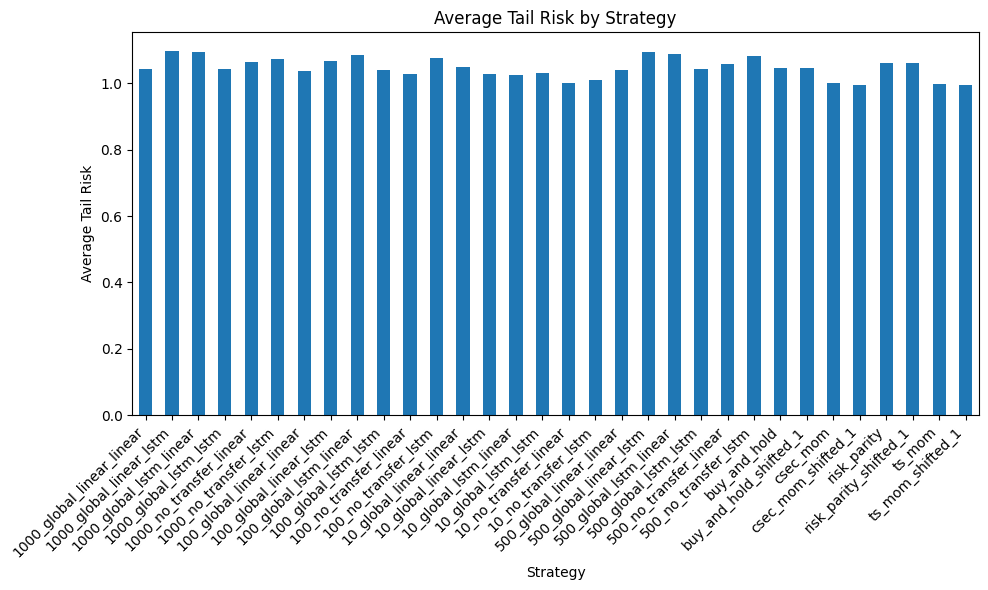

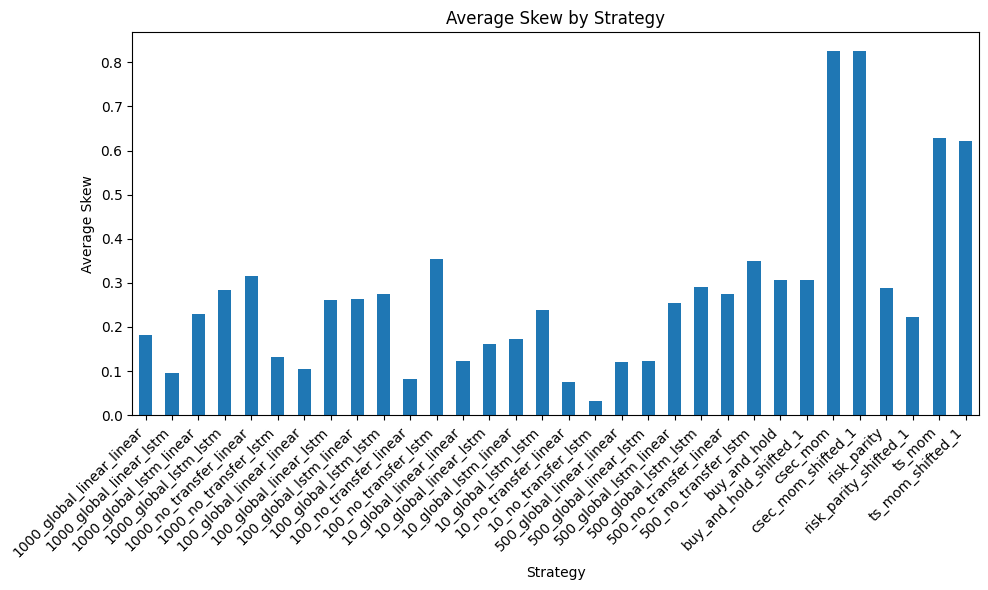

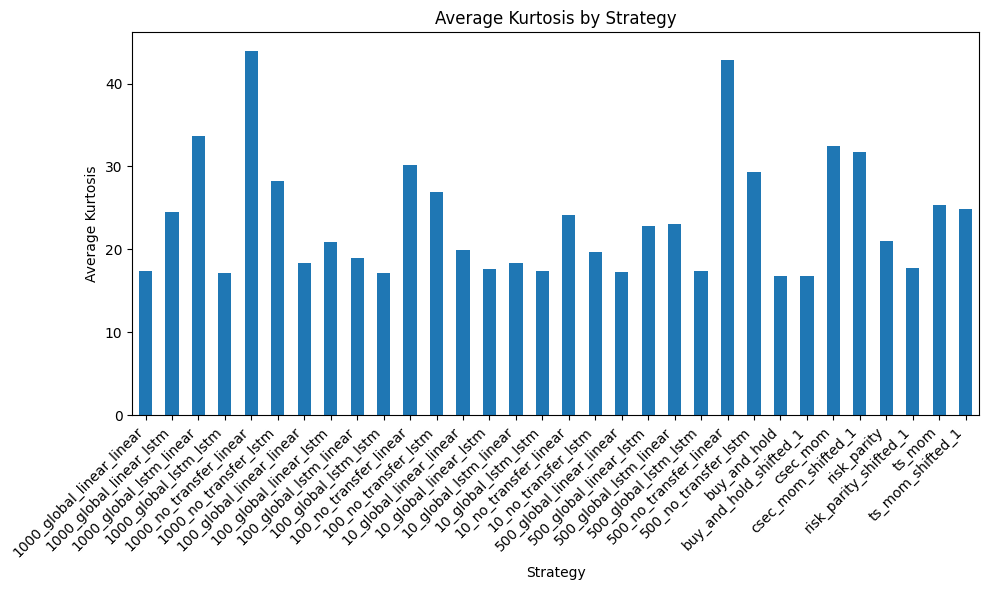

In [161]:
import matplotlib.pyplot as plt

metrics = [
    "average_sharpe_ratio",
    "average_calmar_ratio",
    "average_maximum_draw_down",
    "average_annual_return",
    "average_volatility",
    "average_sortino_ratio",
    "average_down_risk",
    "average_value_at_risk",
    "average_tail_risk",
    "average_skew",
    "average_kurtosis",
]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_grouped[metric].plot(kind="bar")
    plt.title(f"{metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [162]:
results_grouped_rank = results_grouped.copy()
positive_rank_metrics = [
    "average_sharpe_ratio",
    "average_calmar_ratio",
    "average_annual_return",
    "average_sortino_ratio",
]

for metric in positive_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=False, method="min"
    )

negative_rank_metrics = [
    "average_maximum_draw_down",
    "average_volatility",
    "average_down_risk",
    "average_value_at_risk",
    "average_tail_risk",
]

rank_metrics = positive_rank_metrics + negative_rank_metrics
for metric in negative_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=True, method="min"
    )

results_grouped_rank = results_grouped_rank[rank_metrics]
results_grouped_rank


,average_sharpe_ratio,average_calmar_ratio,average_annual_return,average_sortino_ratio,average_maximum_draw_down,average_volatility,average_down_risk,average_value_at_risk,average_tail_risk
transferstrat,,,,,,,,,
1000_global_linear_linear,18.0,16.0,6.0,21.0,2.0,32.0,32.0,1.0,15.0
1000_global_linear_lstm,1.0,2.0,2.0,1.0,14.0,20.0,20.0,14.0,32.0
1000_global_lstm_linear,5.0,4.0,9.0,2.0,18.0,16.0,16.0,18.0,30.0
1000_global_lstm_lstm,16.0,21.0,13.0,19.0,11.0,22.0,23.0,12.0,16.0
1000_no_transfer_linear,23.0,9.0,27.0,16.0,32.0,1.0,1.0,32.0,23.0
1000_no_transfer_lstm,15.0,12.0,20.0,15.0,17.0,15.0,15.0,17.0,25.0
100_global_linear_linear,22.0,13.0,11.0,22.0,3.0,30.0,30.0,3.0,11.0
100_global_linear_lstm,8.0,8.0,4.0,8.0,6.0,27.0,27.0,7.0,24.0
100_global_lstm_linear,2.0,1.0,1.0,3.0,5.0,28.0,28.0,5.0,28.0


In [163]:
results_grouped_rank_total = results_grouped_rank.sum(axis=1)
results_grouped_rank_total

transferstrat
1000_global_linear_linear    143.0
1000_global_linear_lstm      106.0
1000_global_lstm_linear      118.0
1000_global_lstm_lstm        153.0
1000_no_transfer_linear      164.0
1000_no_transfer_lstm        151.0
100_global_linear_linear     145.0
100_global_linear_lstm       119.0
100_global_lstm_linear       101.0
100_global_lstm_lstm         148.0
100_no_transfer_linear       179.0
100_no_transfer_lstm         124.0
10_global_linear_linear      125.0
10_global_linear_lstm        157.0
10_global_lstm_linear        173.0
10_global_lstm_lstm          160.0
10_no_transfer_linear        195.0
10_no_transfer_lstm          186.0
500_global_linear_linear     138.0
500_global_linear_lstm       117.0
500_global_lstm_linear       111.0
500_global_lstm_lstm         144.0
500_no_transfer_linear       160.0
500_no_transfer_lstm         132.0
buy_and_hold                 144.0
buy_and_hold_shifted_1       144.0
csec_mom                     176.0
csec_mom_shifted_1           179.0
risk_p

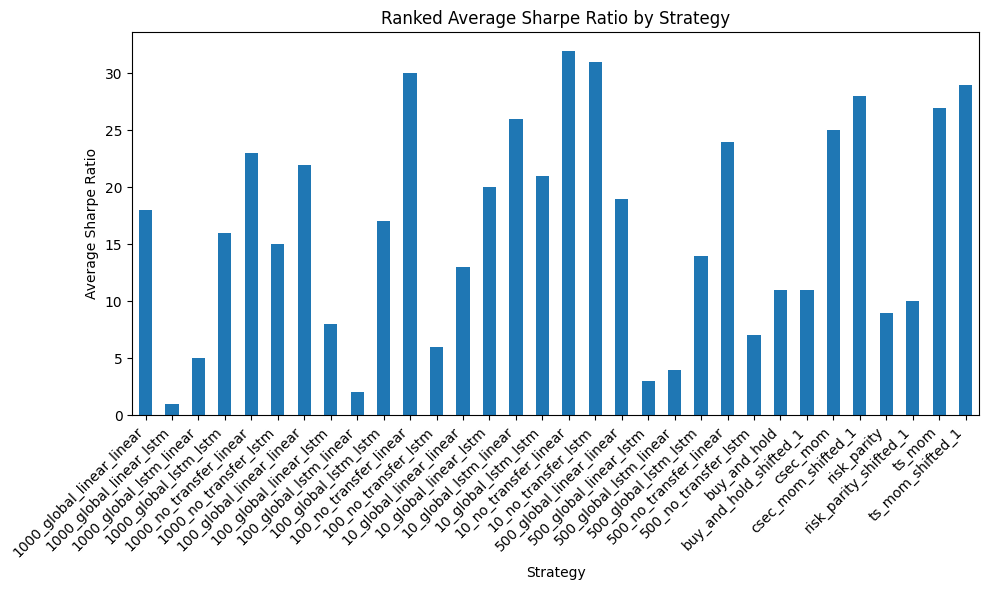

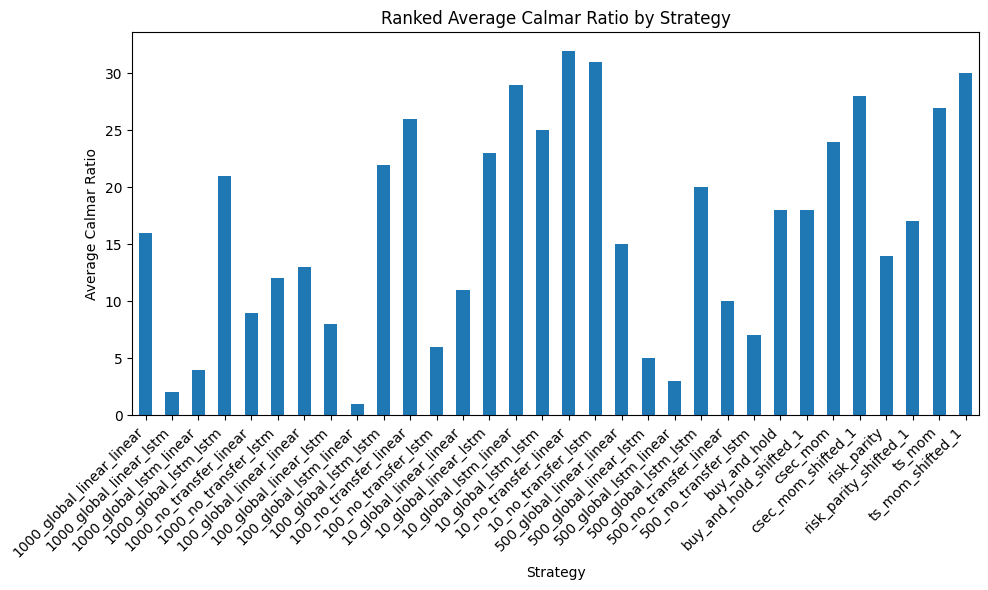

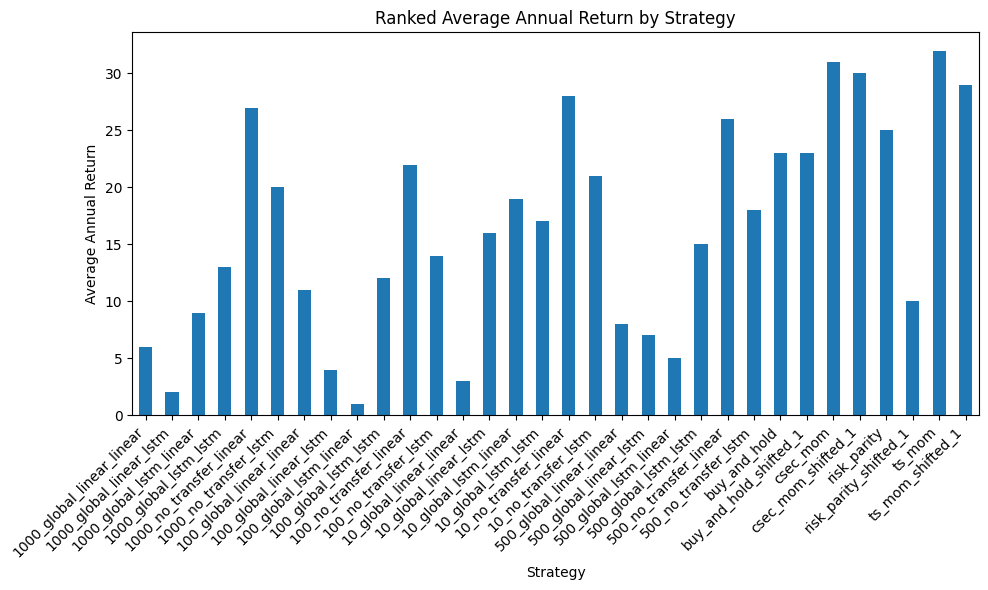

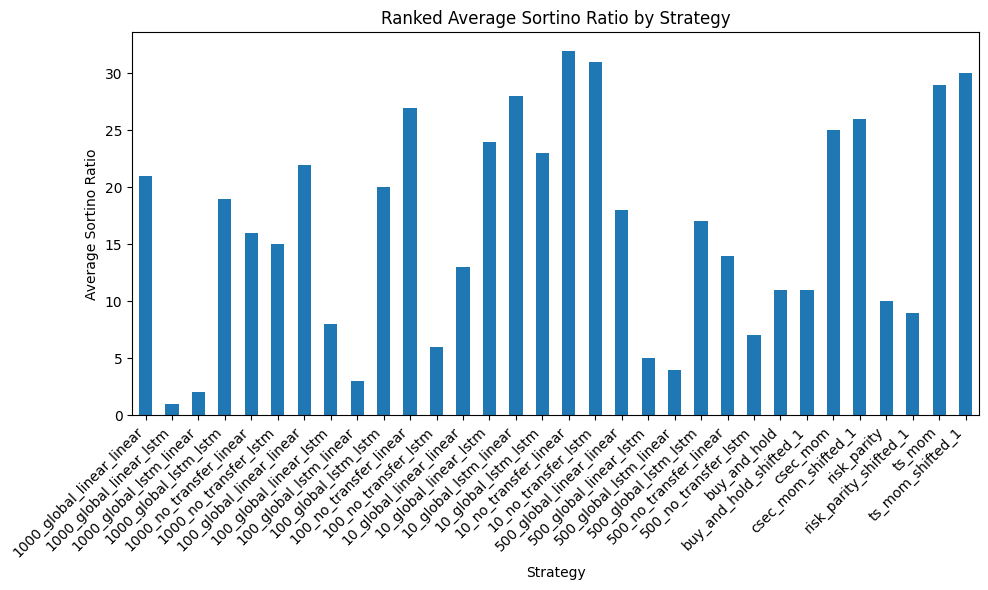

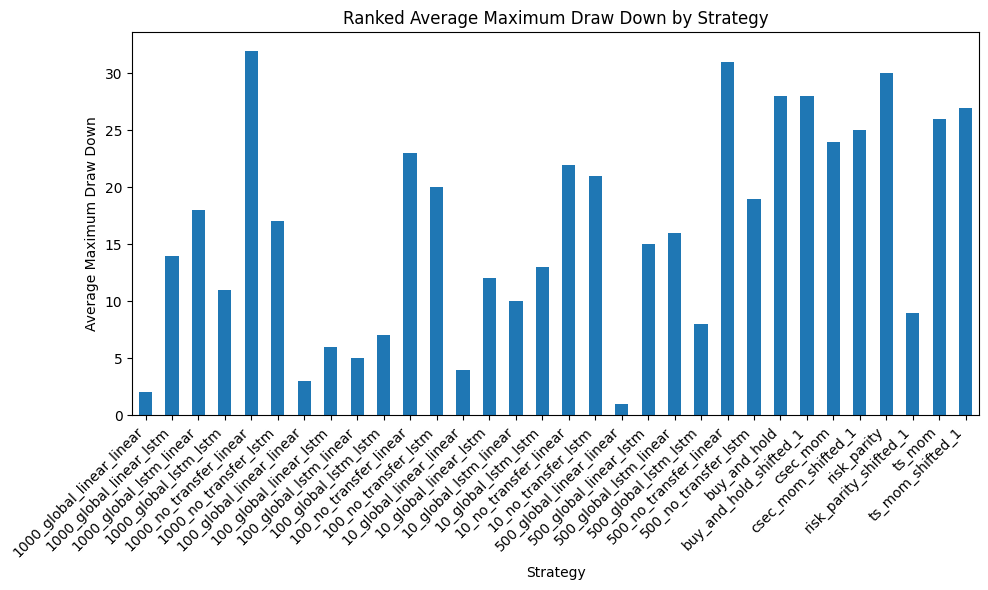

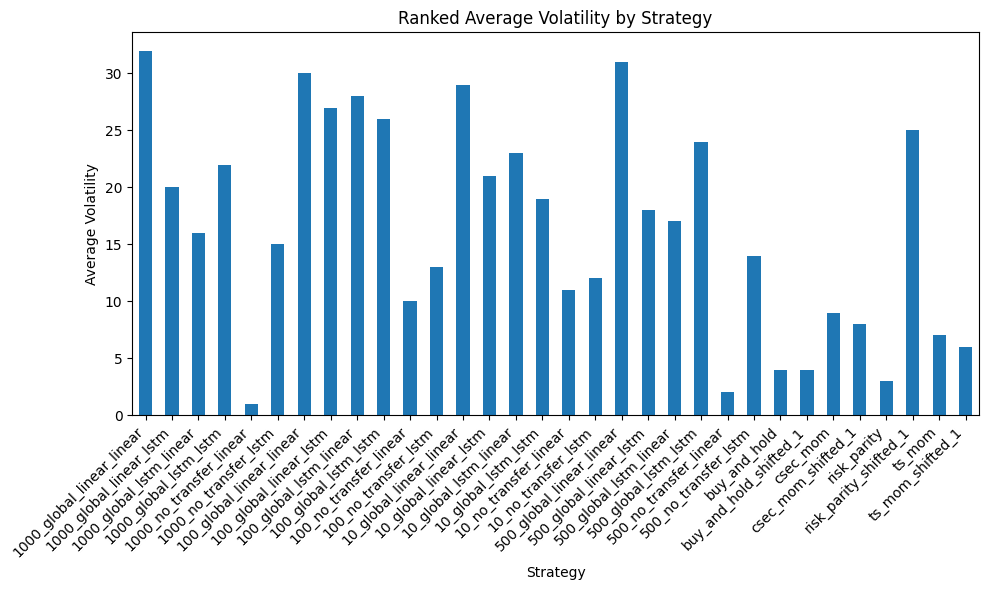

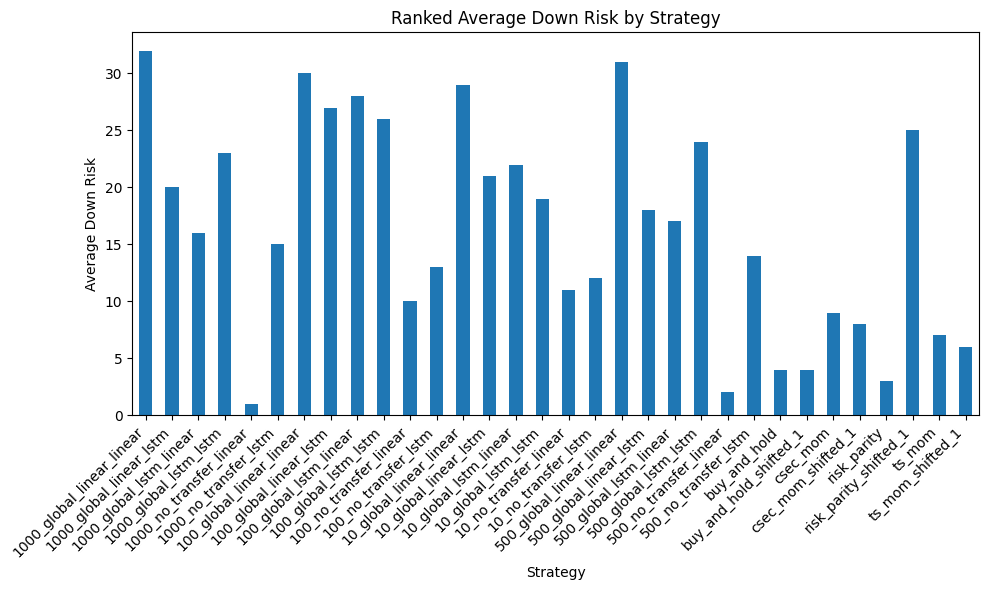

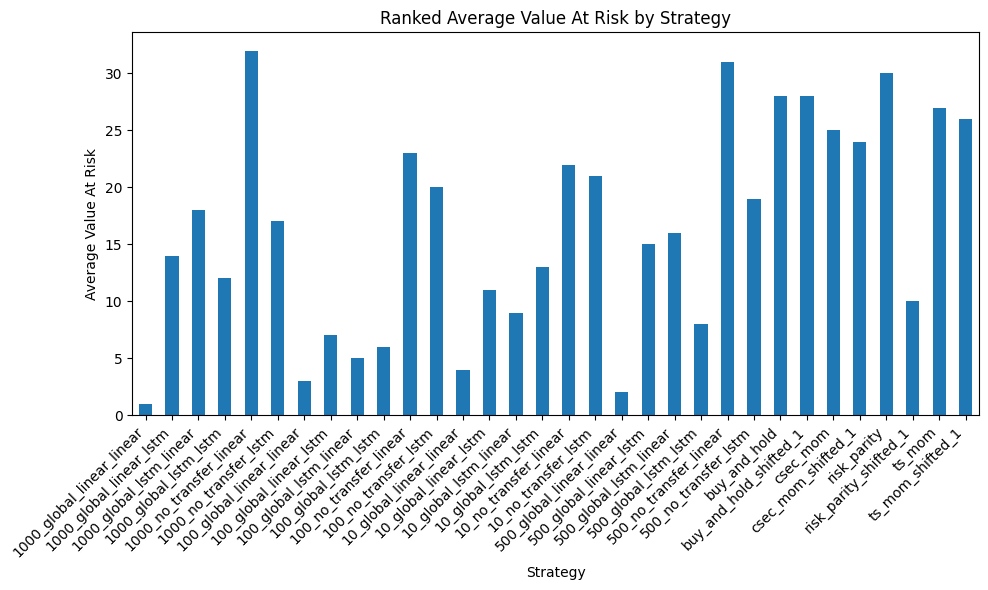

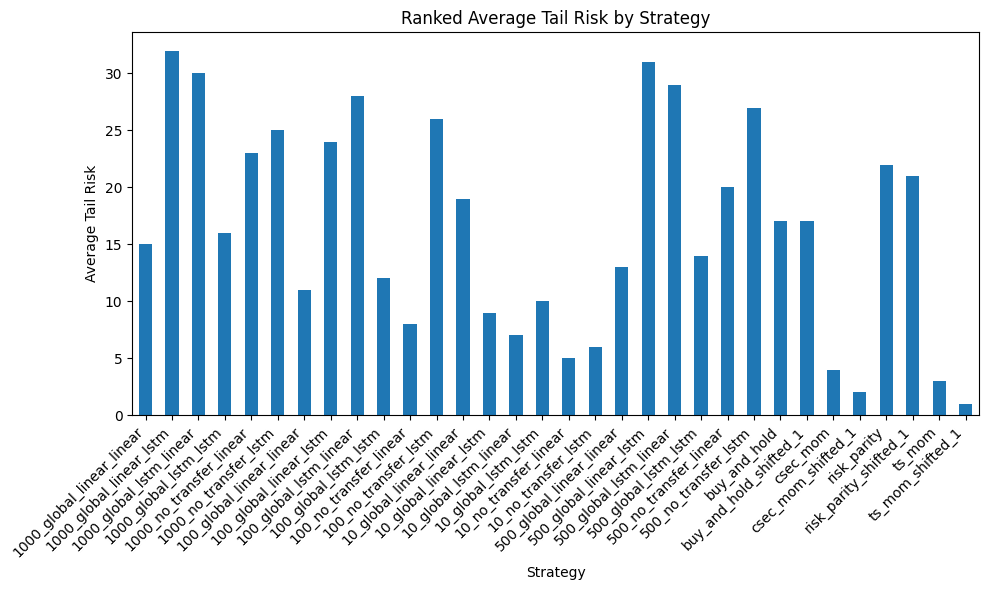

In [164]:
for metric in rank_metrics:
    plt.figure(figsize=(10, 6))
    results_grouped_rank[metric].plot(kind="bar")
    plt.title(f"Ranked {metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

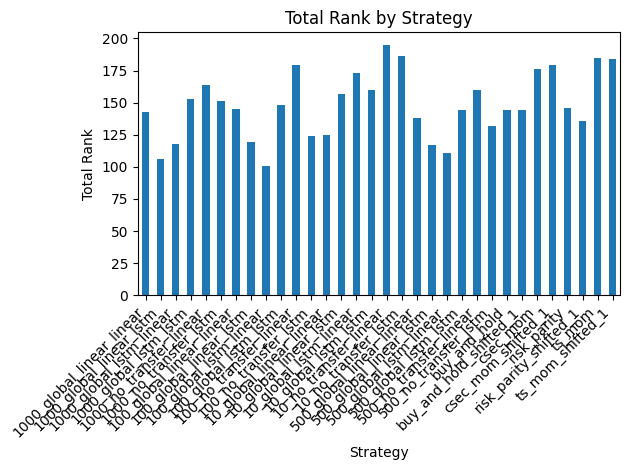

In [165]:
results_grouped_rank_total.plot(kind="bar")
plt.title("Total Rank by Strategy")
plt.ylabel("Total Rank")
plt.xlabel("Strategy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()